# <font color='#0080ff'> SC1015 DS Project </font>

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [32]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.

We use sep='\t' to read tab-delineated data in csv format. 

Immediately after importing, take a quick look at the data using the `head` function.

In [42]:
marketingdata = pd.read_csv('marketing_campaign.csv', sep='\t', lineterminator='\n')
marketingdata.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response\r
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


We then check the other vital statistics of the data such as its `type` and `shape`

In [43]:
print('Type of the data:', type(marketingdata))
print('Dims of the data:', marketingdata.shape)


Type of the data: <class 'pandas.core.frame.DataFrame'>
Dims of the data: (2240, 29)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [44]:
marketingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

---
## <font color = #0080ff> Context </font>
Our group will be exploring this data set on Kaggle which is Customer Personalirt Analysis by Akash Patel.
</br>Source: https://www.kaggle.com/imakash3011/customer-personality-analysis

### <font color = #00cc99>Problem Statement(We can edit)</font>

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### <font color = #00cc99>Content </font>

#### **Attributes**

##### <font color = #ff9999>People</font>

>* ID: Customer's unique identifier
>* Year_Birth: Customer's birth year
>* Education: Customer's education level
>* Marital_Status: Customer's marital status
>* Income: Customer's yearly household income
>* Kidhome: Number of children in customer's household
>* Teenhome: Number of teenagers in customer's household
>* Dt_Customer: Date of customer's enrollment with the company
>* Recency: Number of days since customer's last purchase
>* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

##### <font color = #ff9999>Products</font>

>* MntWines: Amount spent on wine in last 2 years
>* MntFruits: Amount spent on fruits in last 2 years
>* MntMeatProducts: Amount spent on meat in last 2 years
>* MntFishProducts: Amount spent on fish in last 2 years
>* MntSweetProducts: Amount spent on sweets in last 2 years
>* MntGoldProds: Amount spent on gold in last 2 years

##### <font color = #ff9999>Promotion</font>

>* NumDealsPurchases: Number of purchases made with a discount
>* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
>* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
>* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
>* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
>* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
>* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### <font color = #ff9999>Place</font>

>* NumWebPurchases: Number of purchases made through the company’s website
>* NumCatalogPurchases: Number of purchases made using a catalogue
>* NumStorePurchases: Number of purchases made directly in stores
>* NumWebVisitsMonth: Number of visits to company’s website in the last month

### <font color = #00cc99>Target (We can edit)</font>
We will be performing **Classification** first to identify which factors which results in the greatest response which is the customer accepting the offer in the last campaign which allows the company to cater towards customers which fall within this category and also come up with new promotions or survey the customers which fall into the other category on why they did not follow up with the offer in the last campaign.

Next we will perform **Clustering** to to cluster and find out which groups are more likely to accept the offer in the last campaign so that the company can focus their promotions to such customers more.

### <font color = #00cc99>Acknowledgement</font>
The dataset for this project is provided by Dr. Omar Romero-Hernandez.


---
## <font color = #0080ff> We will start by setting up a simple Clustering problem</font>
Response Variable : **Response**     
Predictor Feature : **Income**    

Extract the variables and the associated data as a Pandas `DataFrame`.

In [5]:
income = pd.DataFrame(marketingdata['Income'])
income['Income'] = income['Income'].fillna(0)
mthwine = pd.DataFrame(marketingdata['MntWines'])

<AxesSubplot:>

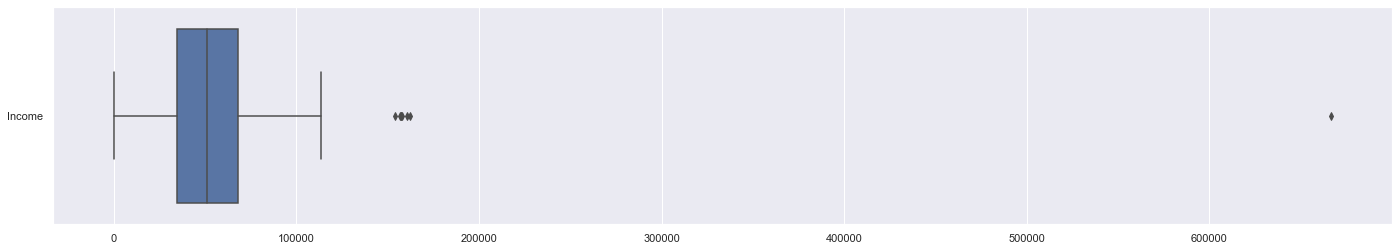

In [6]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = income, orient = "h")

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression object
linreg = LinearRegression()

In [8]:
def linearRegression(dataframe1, dataframe2):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(dataframe1, dataframe2, test_size = 0.25)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(X_train, y_train)
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    plt.show()
    return mean_squared_error(y_test, y_test_pred)

Intercept of Regression 	: b =  [-46.96967392]
Coefficients of Regression 	: a =  [[0.00688772]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2983174389087446
Mean Squared Error (MSE) 	: 79734.68739453483

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3944335029880077
Mean Squared Error (MSE) 	: 67266.02076776884



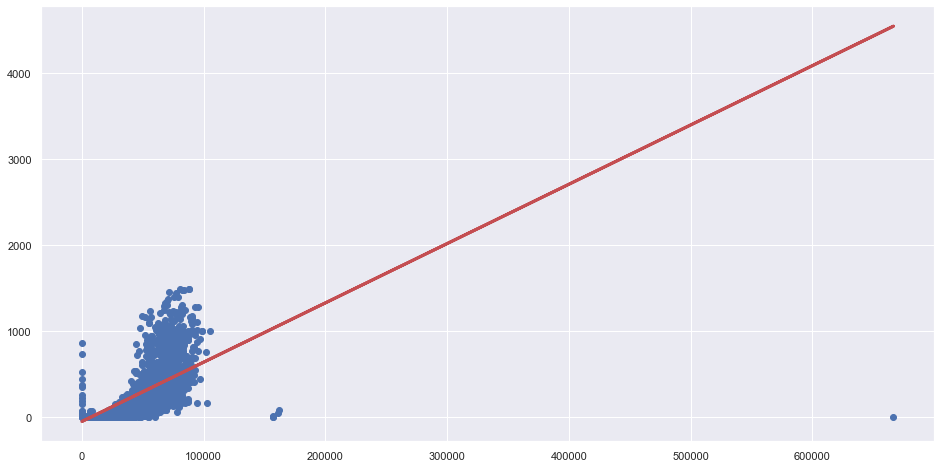

67266.02076776884

In [9]:
linearRegression(income, mthwine)